Soal berikut dikerjakan dengan menggunakan Python:
1. Download data set dari link berikut: https://archive.ics.uci.edu/ml/datasets/iris

Tanpa menggunakan label data (fitur “class”), lakukan cluster analysis pada data berikut menggunakan algoritme k-means. Tentukan juga parameter k yang paling baik menggunakan metode yang telah disampaikan.
  
Kerjakan PR dalam bentuk file format (.ipynb), dan kumpulkan dalam bentuk file (.ipynb) dan bukan berupa link-nya. Setelah itu, upload PR ini ke dalam Google Classroom paling lambat hari Rabu, jam 11.59 malam WIB. Penalti kalau mengumpulkan PR lebih dari tenggat waktu yang telah ditentukan adalah nilai yang kosong (0).

Selamat mengerjakan teman-teman, dan good luck! : )

In [ ]:
#import libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Load Data

In [ ]:
#import data
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df['target'] = data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#check data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data Preprocess

In [ ]:
#check missing value
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
#standardize dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df) 
scaled_data= pd.DataFrame(scaled_data,columns = df.columns)
scaled_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


#Modelling

In [ ]:
kmeans = KMeans(random_state = 123).fit(scaled_data)

In [ ]:
df_result = df.copy()
df_result['cluster'] = kmeans.labels_

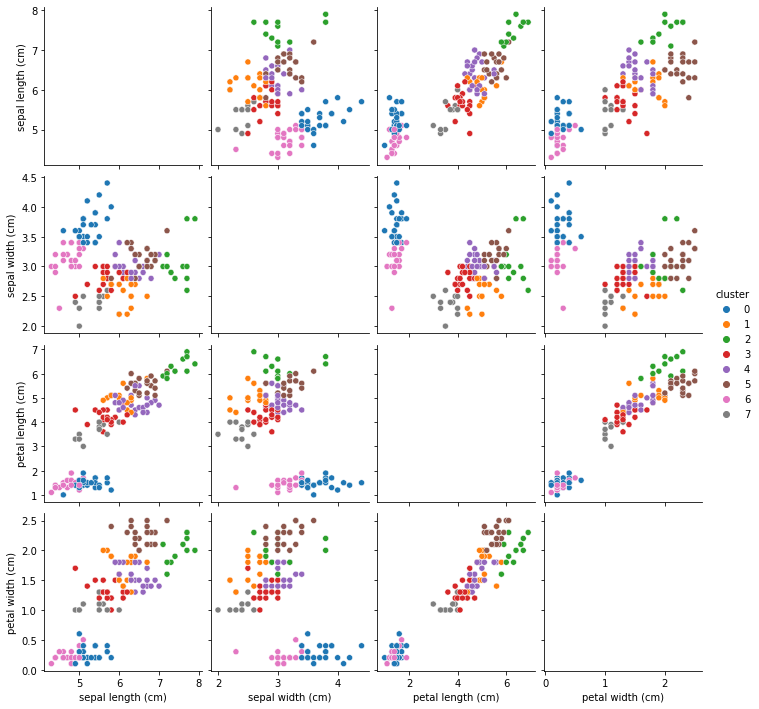

In [ ]:
sns.pairplot(data = df_result, hue = 'cluster', diag_kind = 'None', palette = 'tab10')

Dengan menggunakan default parameter dari python k means menghasilkan 8 cluster data, dimana data masih belum terbagi dengan jelas

#Hyperparameter Tuning

In [ ]:
#Elbow Method
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = []

for k in possible_k:
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(scaled_data)
    
    inertia.append(kmeans.inertia_)

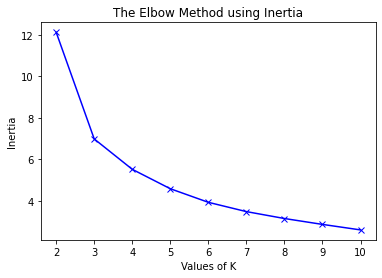

In [ ]:
plt.plot(possible_k, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Dari grafik di atas, terlihat nilai k terbaik = 3

In [ ]:
#silhoutte method
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(scaled_data)
    
    silhouette.append(silhouette_score(X = scaled_data, labels = kmeans.labels_))

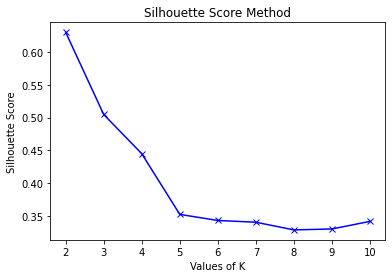

In [ ]:
plt.plot(possible_k, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

Dari grafik di atas terlihat nilai k terbaik dengan silhoutte method adalah 2

#Compare Result

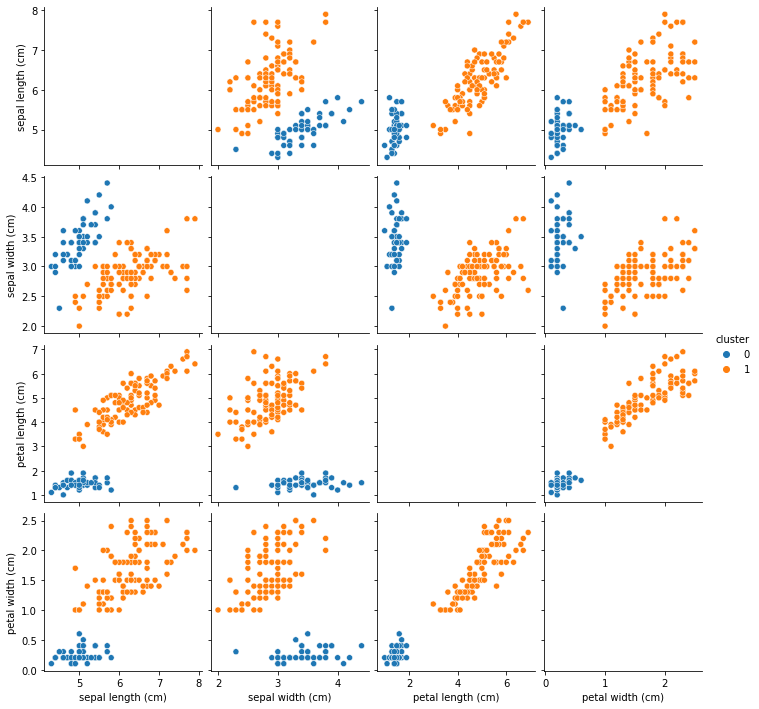

In [ ]:
# 2 clusters

kmeans_2clust = KMeans(n_clusters = 2, random_state = 123).fit(scaled_data)

df_result_2clust = df.copy()
df_result_2clust['cluster'] = kmeans_2clust.labels_

sns.pairplot(data = df_result_2clust, hue = 'cluster', diag_kind = 'None', palette = 'tab10')

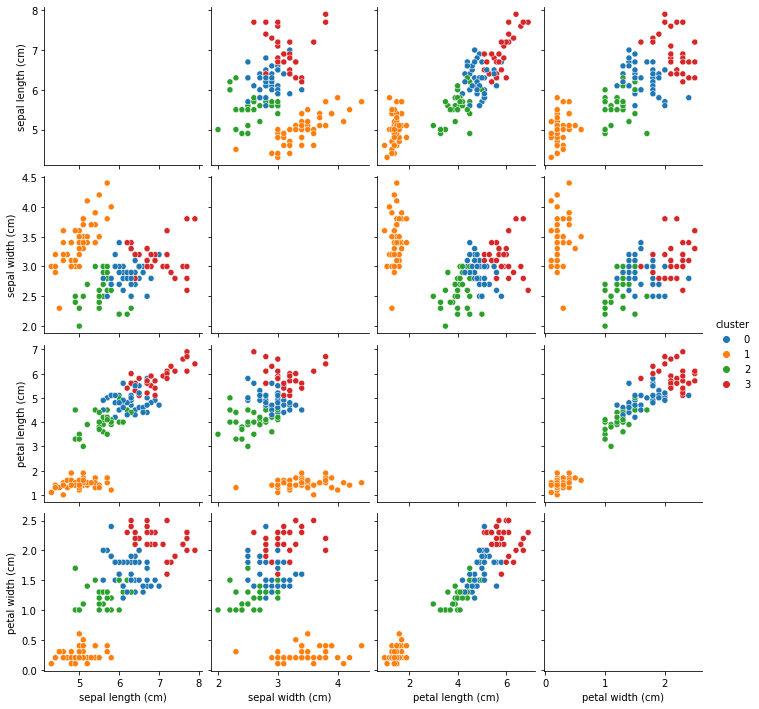

In [ ]:
# 4 clusters

kmeans_4clust = KMeans(n_clusters = 4, random_state = 123).fit(scaled_data)

df_result_4clust = df.copy()
df_result_4clust['cluster'] = kmeans_4clust.labels_

sns.pairplot(data = df_result_4clust, hue = 'cluster', diag_kind = 'None', palette = 'tab10')

Menurut saya, parameter terbaik adalah k = 2 karena data terbagi 2 dengan baik